Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 2ms/step - loss: 0.9121 - accuracy: 0.6184 - val_loss: 0.7226 - val_accuracy: 0.8000
Epoch 2/20
76/76 [==============================] - 0s 1ms/step - loss: 0.5745 - accuracy: 0.7895 - val_loss: 0.5322 - val_accuracy: 0.8000
Epoch 3/20
76/76 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.8289 - val_loss: 0.4845 - val_accuracy: 0.8500
Epoch 4/20
76/76 [==============================] - 0s 1ms/step - loss: 0.3679 - accuracy: 0.8684 - val_loss: 0.4454 - val_accuracy: 0.8500
Epoch 5/20
76/76 [==============================] - 0s 1ms/step - loss: 0.3075 - accuracy: 0.8816 - val_loss: 0.4706 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 0s 1ms/step - loss: 0.2549 - accuracy: 0.9211 - val_loss: 0.4652 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 0s 1ms/step - loss: 0.2124 - accuracy: 0.9342 - val_loss: 0.531

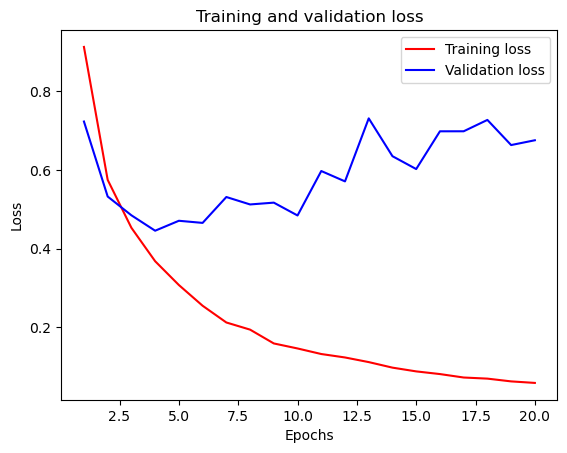

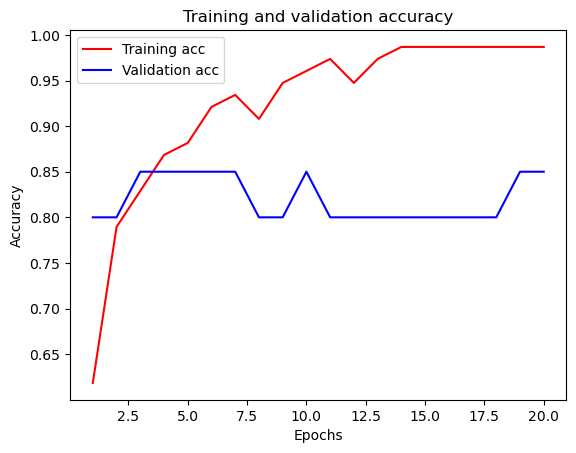

In [1]:
#This is multiclass classifier 
#Three classes : Indonesian guava, green guava, white guava

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

#since we are storing data set as csv file,
# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

#Identify the target variable(labels) and features separately. 
# Identify the target variable
target = df['label']

# Identify the feature variables
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
#since epochs needs to change initialize it here.
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Train on 76 samples, validate on 20 samples
Epoch 1/50
76/76 [==============================] - 0s 1ms/step - loss: 1.2220 - accuracy: 0.3026 - val_loss: 1.3171 - val_accuracy: 0.2500
Epoch 2/50
76/76 [==============================] - 0s 78us/step - loss: 1.1852 - accuracy: 0.3026 - val_loss: 1.2724 - val_accuracy: 0.3000
Epoch 3/50
76/76 [==============================] - 0s 106us/step - loss: 1.1512 - accuracy: 0.3289 - val_loss: 1.2301 - val_accuracy: 0.3000
Epoch 4/50
76/76 [==============================] - 0s 66us/step - loss: 1.1198 - accuracy: 0.3289 - val_loss: 1.1884 - val_accuracy: 0.2500
Epoch 5/50
76/76 [==============================] - 0s 96us/step - loss: 1.0883 - accuracy: 0.3289 - val_loss: 1.1519 - val_accuracy: 0.2500
Epoch 6/50
76/76 [==============================] - 0s 65us/step - loss: 1.0599 - accuracy: 0.3553 - val_loss: 1.1169 - val_accuracy: 0.2000
Epoch 7/50
76/76 [==============================] - 0s 104us/step - loss: 1.0338 - accuracy: 0.4079 - val_loss

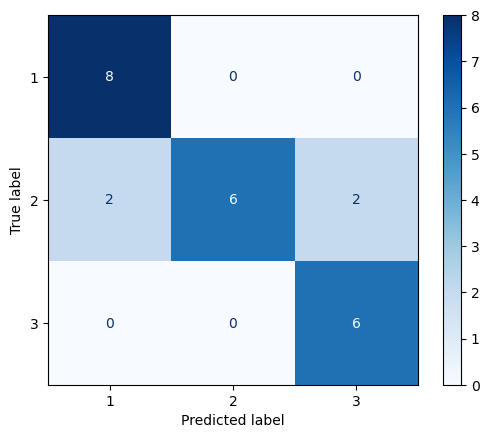

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from keras import models, layers

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the input dimension based on the number of features
input_dim = x_train_scaled.shape[1]

# Model 1: Simple model
model1 = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')  # Assuming 3 classes for classification
])

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model1.fit(x_train_scaled, y_train_encoded, epochs=50, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_test_pred_encoded = model1.predict(x_test_scaled)

# Decode the one-hot encoded predictions and true labels back to the original class labels
y_test_pred = encoder.inverse_transform(y_test_pred_encoded)
y_test_true = y_test.values

# Generate the confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.categories_[0])
disp.plot(cmap=plt.cm.Blues)
plt.show()


Using early stopping save the best model as finalmodel.h5 file. 

Train on 76 samples, validate on 20 samples
Epoch 1/50
76/76 [==============================] - 0s 3ms/step - loss: 0.8772 - accuracy: 0.6447 - val_loss: 0.7397 - val_accuracy: 0.8000
Epoch 2/50
76/76 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.7500 - val_loss: 0.5435 - val_accuracy: 0.8000
Epoch 3/50
76/76 [==============================] - 0s 995us/step - loss: 0.4954 - accuracy: 0.8289 - val_loss: 0.4641 - val_accuracy: 0.8000
Epoch 4/50
76/76 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.8289 - val_loss: 0.4695 - val_accuracy: 0.8000
Epoch 5/50
76/76 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8289 - val_loss: 0.4223 - val_accuracy: 0.8500
Epoch 6/50
76/76 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8553 - val_loss: 0.4162 - val_accuracy: 0.8500
Epoch 7/50
76/76 [==============================] - 0s 1ms/step - loss: 0.2880 - accuracy: 0.8553 - val_loss: 0.42

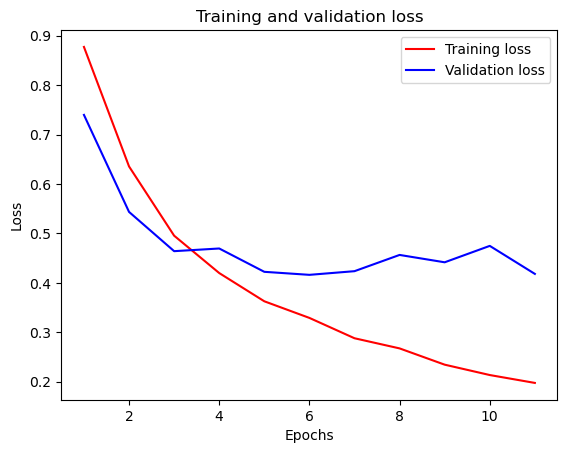

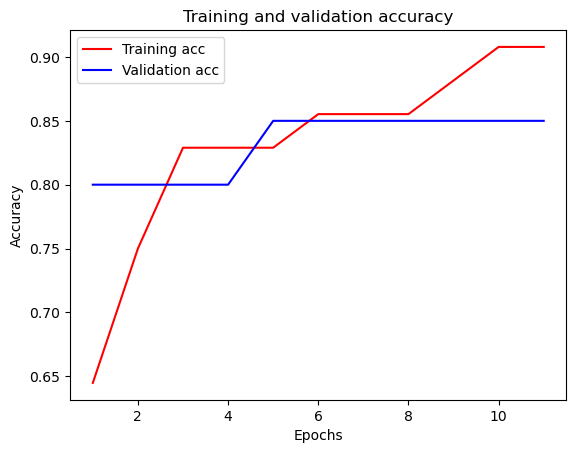

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models, layers, callbacks
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping and model checkpoint callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = callbacks.ModelCheckpoint('finalmodel.h5', save_best_only=True)

# Train the model with early stopping and model checkpoint
val_epochs = 50
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, 
                    validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")

# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


K-fold cross validation

In [5]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
histories = []

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

for train_index, test_index in kf.split(features):
    # Split the data into train and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Scale the feature data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit and transform the training labels
    y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
    
    # Transform the testing labels
    y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))
    
    # Define the model
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(y_train_encoded.shape[1], activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    val_epochs = 20
    history = model.fit(X_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
    print(f"Fold accuracy: {test_accuracy}")
    
    accuracies.append(test_accuracy)
    histories.append(history.history)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean accuracy: {mean_accuracy}")

Fold accuracy: 1.0
Fold accuracy: 1.0
Fold accuracy: 0.75
Fold accuracy: 0.9166666865348816
Fold accuracy: 1.0
Fold accuracy: 1.0
Fold accuracy: 0.8333333134651184
Fold accuracy: 0.9166666865348816
Fold accuracy: 0.9166666865348816
Fold accuracy: 0.5833333134651184
Mean accuracy: 0.8916666686534882


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import load_model

# Load the model
model = load_model('finalmodel.h5')

# Load the dataset to get feature names and to fit the scaler
df = pd.read_csv('data.csv', delimiter=';')

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Fit the scaler on the full dataset
scaler = StandardScaler()
scaler.fit(features)

def get_user_input():
    input_features = []
    feature_names = features.columns  # Get feature names from the dataset
    for feature in feature_names:
        value = float(input(f"Enter value for {feature}: "))
        input_features.append(value)
    return np.array(input_features).reshape(1, -1)

# Get user input
user_input = get_user_input()
user_input_scaled = scaler.transform(user_input)

# Predict the class
predicted_class = model.predict(user_input_scaled)
predicted_class_index = np.argmax(predicted_class)

# Map class index to species name
species_names = {0: "Indonesian Guava (Psidium guajava var. Red)", 1: "White Guava (Psidium guajava)", 2: "Green Guava (Psidium guajava var. Green)"}

# Print the predicted species name
print(f"Predicted class: {species_names.get(predicted_class_index, 'Unknown')}")


Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Enter value for Area(cm^2): 50.497
Enter value for W/L: 0.4230
Enter value for Patiole Length(mm): 7.2514
Enter value for Number of Pairs: 23.16
Enter value for Ratio: 55.265
Predicted class: Indonesian Guava (Psidium guajava var. Red)


C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
